## **Loading Data Downloaded From Kaggle**


In [2]:
customer_data=read.csv("/home/pipebomb/Downloads/Mall_Customers.csv")
str(customer_data)
names(customer_data)

'data.frame':	200 obs. of  5 variables:
 $ CustomerID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Gender                : Factor w/ 2 levels "Female","Male": 2 2 1 1 1 1 1 1 2 1 ...
 $ Age                   : int  19 21 20 23 31 22 35 23 64 30 ...
 $ Annual.Income..k..    : int  15 15 16 16 17 17 18 18 19 19 ...
 $ Spending.Score..1.100.: int  39 81 6 77 40 76 6 94 3 72 ...


[1] "CustomerID"             "Gender"                 "Age"                   
[4] "Annual.Income..k.."     "Spending.Score..1.100."


- Summary of customer data according 
- Below is the information of Age


In [12]:
head(customer_data)
summary(customer_data$Age)

CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

In [13]:
#Standard Deviation
sd(customer_data$Age)

[1] 13.96901

In [14]:
summary(customer_data$Annual.Income..k..)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

## Customer Gender Visualization

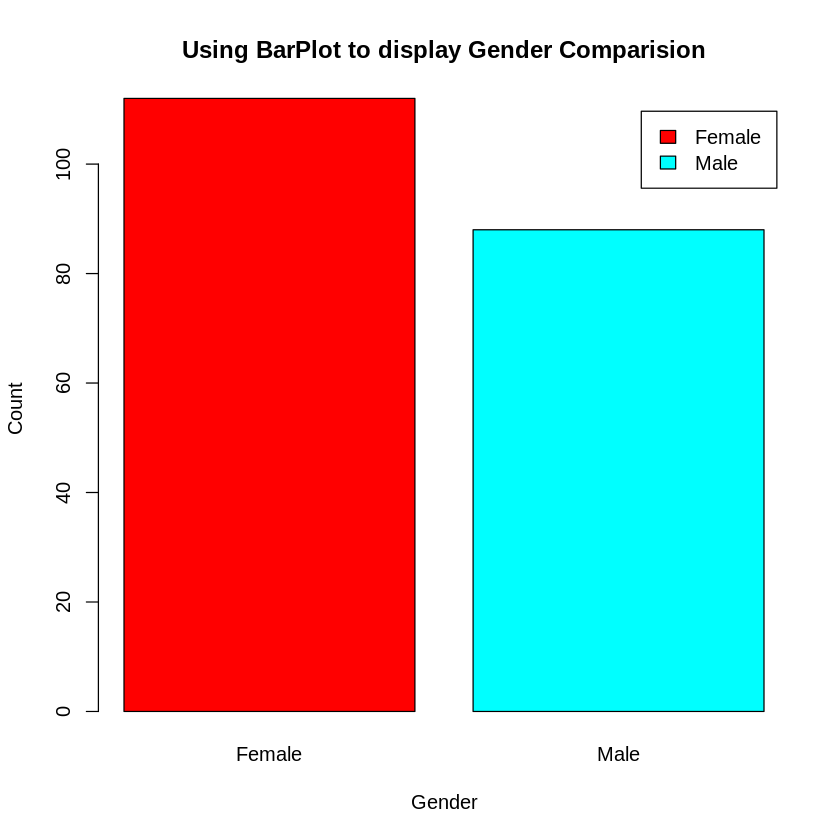

In [16]:
a=table(customer_data$Gender)
barplot(a,main="Using BarPlot to display Gender Comparision",
       ylab="Count",
       xlab="Gender",
       col=rainbow(2),
       legend=rownames(a))

## Visualization of Age Distribution


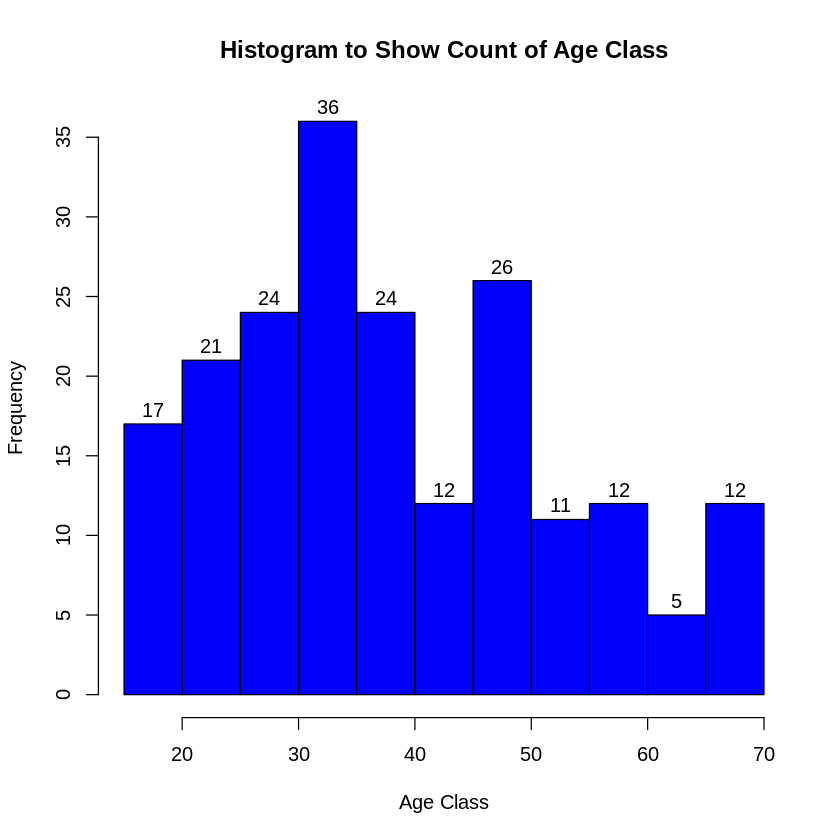

In [17]:
hist(customer_data$Age,
    col="blue",
    main="Histogram to Show Count of Age Class",
    xlab="Age Class",
    ylab="Frequency",
    labels=TRUE)

## Analysis of the Annual Income of the Customers


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

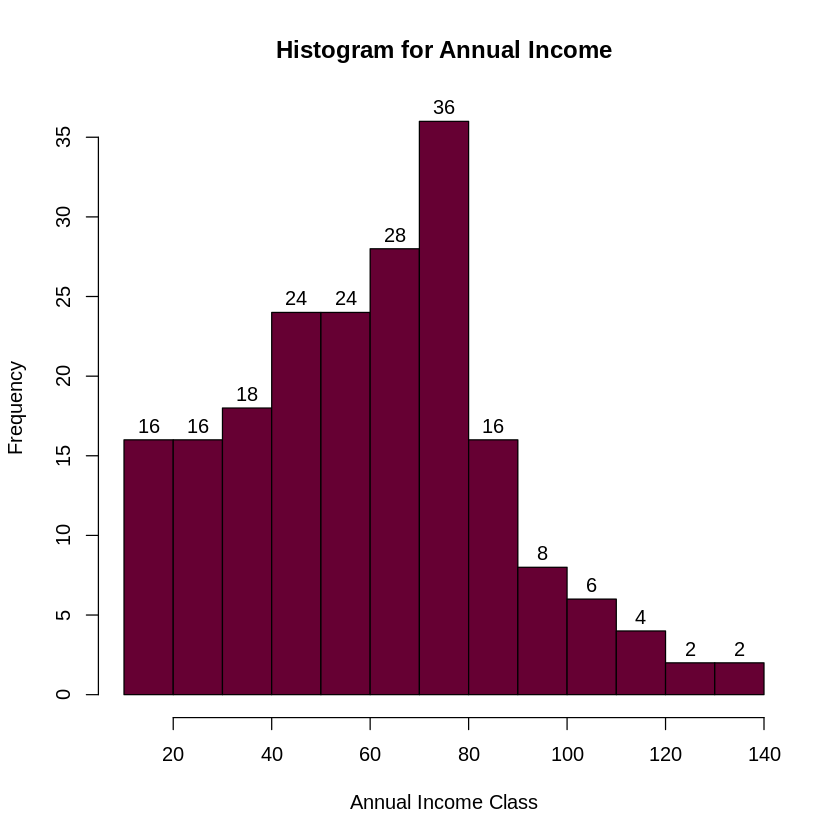

In [18]:
summary(customer_data$Annual.Income..k..)
hist(customer_data$Annual.Income..k..,
  col="#660033",
  main="Histogram for Annual Income",
  xlab="Annual Income Class",
  ylab="Frequency",
  labels=TRUE)

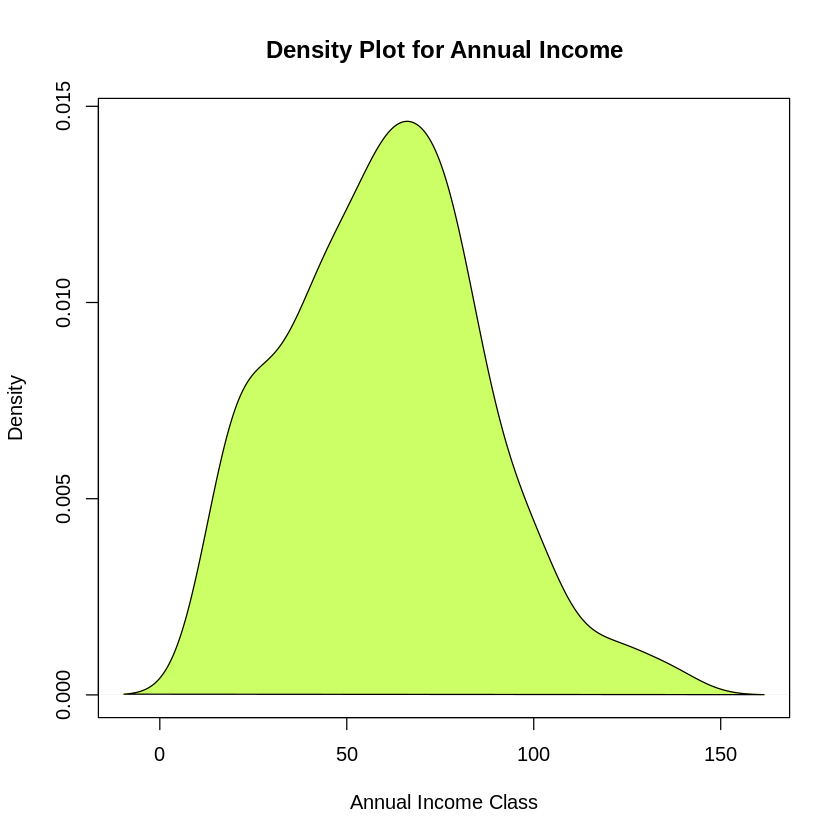

In [21]:
plot(density(customer_data$Annual.Income..k..),
    col="yellow",
    main="Density Plot for Annual Income",
    xlab="Annual Income Class",
    ylab="Density")
# Fills Polygon inside with color
polygon(density(customer_data$Annual.Income..k..),
        col="#ccff66")

## Analyzing Spending Score of the Customers


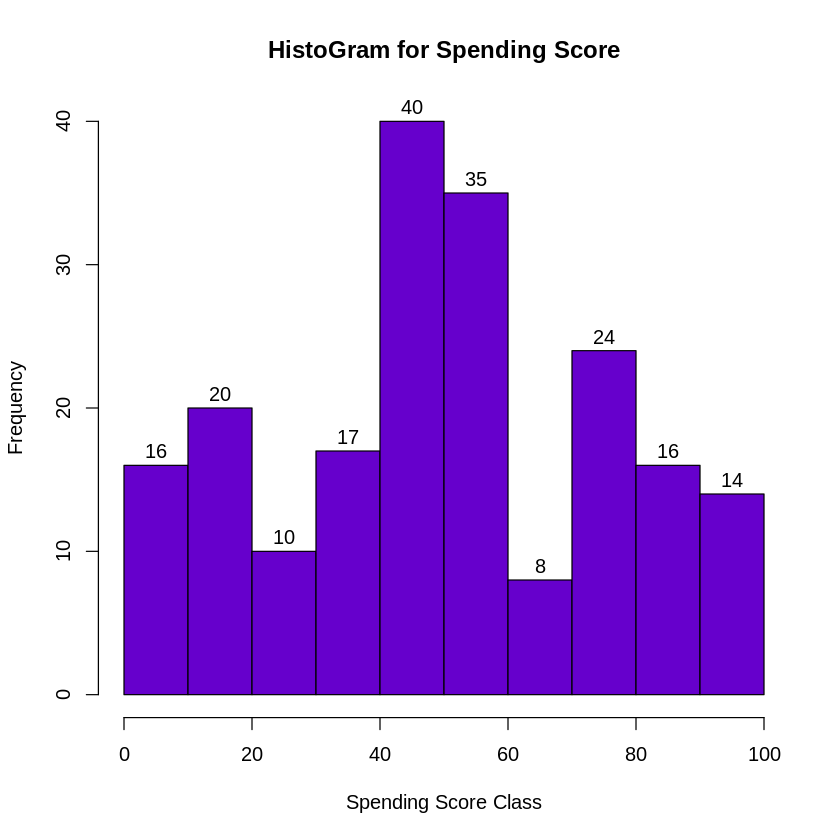

In [22]:
hist(customer_data$Spending.Score..1.100.,
    main="HistoGram for Spending Score",
    xlab="Spending Score Class",
    ylab="Frequency",
    col="#6600cc",
    labels=TRUE)

# CLUSTERING MALL CUSTOMERS USING K-MEANS CLUSTERING

### <b>While using the k-means clustering algorithm, the first step is to indicate the number of clusters (k) that we wish to produce in the final output. The algorithm starts by selecting k objects from dataset randomly that will serve as the initial centers for our clusters. These selected objects are the cluster means, also known as centroids. Then, the remaining objects have an assignment of the closest centroid. This centroid is defined by the Euclidean Distance present between the object and the cluster mean. We refer to this step as “cluster assignment”. </b>

# Determining Optimal Clusters Using Elbow Method
### <b>First, we calculate the clustering algorithm for several values of k. This can be done by creating a variation within k from 1 to 10 clusters. We then calculate the total intra-cluster sum of square (iss). Then, we proceed to plot iss based on the number of k clusters. This plot denotes the appropriate number of clusters required in our model. In the plot, the location of a bend or a knee is the indication of the optimum number of clusters.</b>

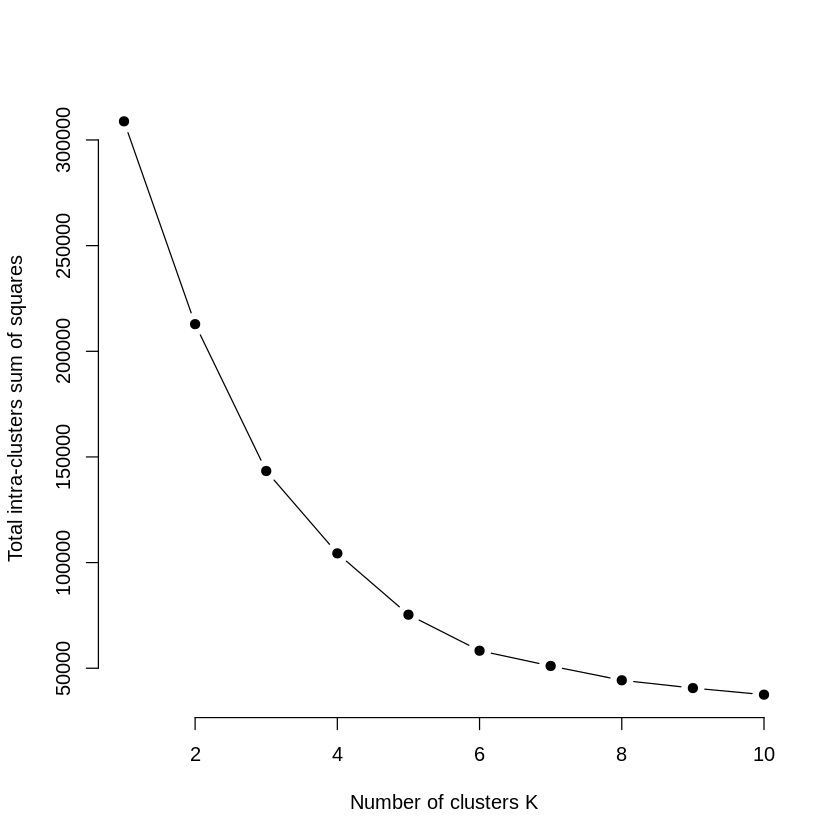

In [25]:
library(purrr)
set.seed(123)
# function to calculate total intra-cluster sum of square 
iss <- function(k) {
  kmeans(customer_data[,3:5],k,iter.max=100,nstart=100,algorithm="Lloyd" )$tot.withinss
}

k.values <- 1:10


iss_values <- map_dbl(k.values, iss)

plot(k.values, iss_values,
    type="b", pch = 19, frame = FALSE, 
    xlab="Number of clusters K",
    ylab="Total intra-clusters sum of squares")

## From the above graph, we conclude that 6 is the appropriate number of clusters since it seems to be appearing at the bend in the elbow plot.


## Visualizing the Clustering Results using the First Two Principle Components

In [27]:
pcclust=prcomp(customer_data[,3:5],scale=FALSE) #principal component analysis
summary(pcclust)

pcclust$rotation[,1:2]

Importance of components:
                           PC1     PC2     PC3
Standard deviation     26.4625 26.1597 12.9317
Proportion of Variance  0.4512  0.4410  0.1078
Cumulative Proportion   0.4512  0.8922  1.0000

,PC1,PC2
Age,0.1889742,-0.1309652
Annual.Income..k..,-0.5886410,-0.8083757
Spending.Score..1.100.,-0.7859965,0.5739136


## Creating Clusters Using K-MEANS

In [43]:
k6<-kmeans(customer_data[,3:5],6,iter.max=100,nstart=50,algorithm="Lloyd")
print(k6)

K-means clustering with 6 clusters of sizes 22, 21, 45, 38, 35, 39

Cluster means:
       Age Annual.Income..k.. Spending.Score..1.100.
1 25.27273           25.72727               79.36364
2 44.14286           25.14286               19.52381
3 56.15556           53.37778               49.08889
4 27.00000           56.65789               49.13158
5 41.68571           88.22857               17.28571
6 32.69231           86.53846               82.12821

Clustering vector:
  [1] 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 [38] 1 2 1 3 1 3 4 2 1 3 4 4 4 3 4 4 3 3 3 3 3 4 3 3 4 3 3 3 4 3 3 4 4 3 3 3 3
 [75] 3 4 3 4 4 3 3 4 3 3 4 3 3 4 4 3 3 4 3 4 4 4 3 4 3 4 4 3 3 4 3 4 3 3 3 3 3
[112] 4 4 4 4 4 3 3 3 3 4 4 4 6 4 6 5 6 5 6 5 6 4 6 5 6 5 6 5 6 5 6 4 6 5 6 5 6
[149] 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5
[186] 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6

Within cluster sum of squares by cluster:
[1]  4099.818  7732.381  8062.133  7742.895 166

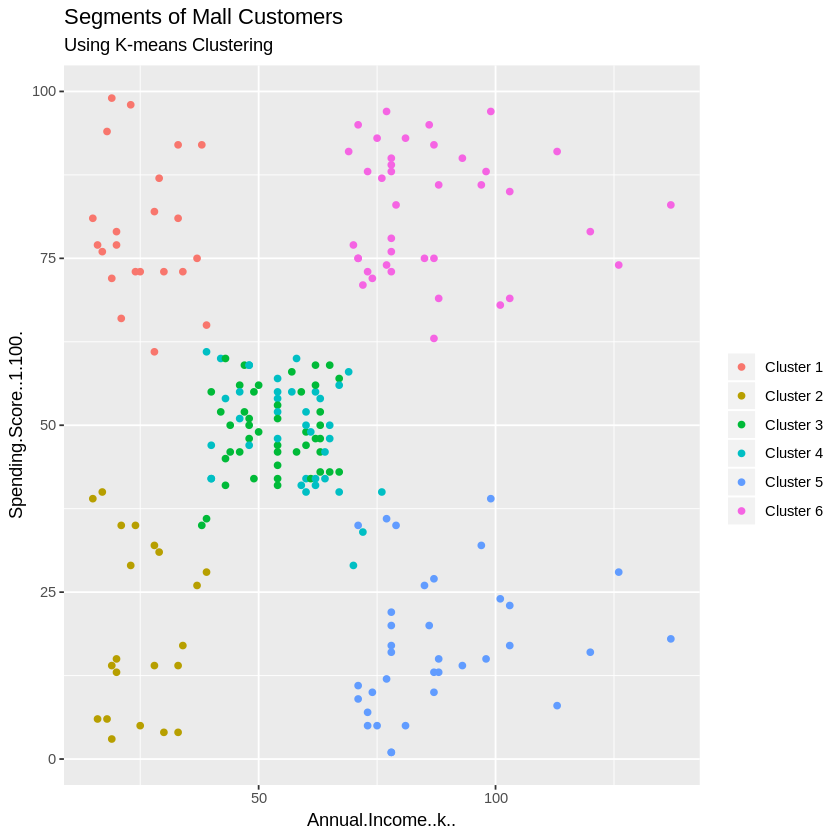

In [44]:
library(ggplot2)
set.seed(1)
ggplot(customer_data, aes(x =Annual.Income..k.., y = Spending.Score..1.100.)) + 
  geom_point(stat = "identity", aes(color = as.factor(k6$cluster))) +
  scale_color_discrete(name=" ",
              breaks=c("1", "2", "3", "4", "5","6"),
              labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","Cluster 6")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")